# Tutorial - Step1 : Pretraining with contractive and margin losses

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from COMA.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from COMA.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "logp06"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_3-1_{PROPERTY_NAME.upper()}_pretraining"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of COMA

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             total_steps=200000,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00200000]  loss(tr): 3.368  loss_recon_src(tr): 3.372  loss_recon_tar(tr): 3.365  loss_recon_neg(tr): 3.367  loss_contractive(tr): 0.320  loss_margin(tr): 1.933  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.095  similarity(va): 0.002
[00001000/00200000]  loss(tr): 0.714  loss_recon_src(tr): 0.704  loss_recon_tar(tr): 0.663  loss_recon_neg(tr): 0.704  loss_contractive(tr): 2.232  loss_margin(tr): 0.021  beta: 0.010  gamma: 0.010  valid_ratio(va): 0.910  similarity(va): 0.118
[00002000/00200000]  loss(tr): 0.564  loss_recon_src(tr): 0.529  loss_recon_tar(tr): 0.509  loss_recon_neg(tr): 0.566  loss_contractive(tr): 1.262  loss_margin(tr): 0.020  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.995  similarity(va): 0.160
[00003000/00200000]  loss(tr): 0.484  loss_recon_src(tr): 0.460  loss_recon_tar(tr): 0.438  loss_recon_neg(tr): 0.444  loss_contractive(tr): 1.165  loss_margin(tr): 0.063  beta: 0.030  gamma: 0.030  valid_ratio(va): 0.965  similarity(va): 0.177
[00004000/00200000] 

[00034000/00200000]  loss(tr): 0.231  loss_recon_src(tr): 0.117  loss_recon_tar(tr): 0.129  loss_recon_neg(tr): 0.137  loss_contractive(tr): 0.231  loss_margin(tr): 0.069  beta: 0.340  gamma: 0.340  valid_ratio(va): 0.995  similarity(va): 0.401
[00035000/00200000]  loss(tr): 0.235  loss_recon_src(tr): 0.137  loss_recon_tar(tr): 0.133  loss_recon_neg(tr): 0.144  loss_contractive(tr): 0.220  loss_margin(tr): 0.056  beta: 0.350  gamma: 0.350  valid_ratio(va): 1.000  similarity(va): 0.383
[00036000/00200000]  loss(tr): 0.213  loss_recon_src(tr): 0.108  loss_recon_tar(tr): 0.134  loss_recon_neg(tr): 0.155  loss_contractive(tr): 0.191  loss_margin(tr): 0.027  beta: 0.360  gamma: 0.360  valid_ratio(va): 1.000  similarity(va): 0.416
[00037000/00200000]  loss(tr): 0.262  loss_recon_src(tr): 0.130  loss_recon_tar(tr): 0.134  loss_recon_neg(tr): 0.149  loss_contractive(tr): 0.221  loss_margin(tr): 0.112  beta: 0.370  gamma: 0.370  valid_ratio(va): 1.000  similarity(va): 0.419
[00038000/00200000] 

[00068000/00200000]  loss(tr): 0.272  loss_recon_src(tr): 0.116  loss_recon_tar(tr): 0.126  loss_recon_neg(tr): 0.114  loss_contractive(tr): 0.178  loss_margin(tr): 0.048  beta: 0.680  gamma: 0.680  valid_ratio(va): 1.000  similarity(va): 0.407
[00069000/00200000]  loss(tr): 0.290  loss_recon_src(tr): 0.103  loss_recon_tar(tr): 0.120  loss_recon_neg(tr): 0.133  loss_contractive(tr): 0.183  loss_margin(tr): 0.064  beta: 0.690  gamma: 0.690  valid_ratio(va): 1.000  similarity(va): 0.436
[00070000/00200000]  loss(tr): 0.229  loss_recon_src(tr): 0.083  loss_recon_tar(tr): 0.095  loss_recon_neg(tr): 0.109  loss_contractive(tr): 0.155  loss_margin(tr): 0.033  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.450
[00071000/00200000]  loss(tr): 0.269  loss_recon_src(tr): 0.116  loss_recon_tar(tr): 0.130  loss_recon_neg(tr): 0.110  loss_contractive(tr): 0.130  loss_margin(tr): 0.083  beta: 0.710  gamma: 0.710  valid_ratio(va): 1.000  similarity(va): 0.411
[00072000/00200000] 

[00102000/00200000]  loss(tr): 0.231  loss_recon_src(tr): 0.088  loss_recon_tar(tr): 0.099  loss_recon_neg(tr): 0.101  loss_contractive(tr): 0.106  loss_margin(tr): 0.028  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.453
[00103000/00200000]  loss(tr): 0.258  loss_recon_src(tr): 0.098  loss_recon_tar(tr): 0.119  loss_recon_neg(tr): 0.092  loss_contractive(tr): 0.095  loss_margin(tr): 0.061  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.422
[00104000/00200000]  loss(tr): 0.308  loss_recon_src(tr): 0.115  loss_recon_tar(tr): 0.132  loss_recon_neg(tr): 0.085  loss_contractive(tr): 0.163  loss_margin(tr): 0.037  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.418
[00105000/00200000]  loss(tr): 0.314  loss_recon_src(tr): 0.098  loss_recon_tar(tr): 0.121  loss_recon_neg(tr): 0.105  loss_contractive(tr): 0.130  loss_margin(tr): 0.076  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.437
[00106000/00200000] 

[00136000/00200000]  loss(tr): 0.297  loss_recon_src(tr): 0.101  loss_recon_tar(tr): 0.110  loss_recon_neg(tr): 0.114  loss_contractive(tr): 0.123  loss_margin(tr): 0.065  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.384
[00137000/00200000]  loss(tr): 0.284  loss_recon_src(tr): 0.095  loss_recon_tar(tr): 0.114  loss_recon_neg(tr): 0.106  loss_contractive(tr): 0.134  loss_margin(tr): 0.045  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.445
[00138000/00200000]  loss(tr): 0.292  loss_recon_src(tr): 0.099  loss_recon_tar(tr): 0.104  loss_recon_neg(tr): 0.118  loss_contractive(tr): 0.098  loss_margin(tr): 0.087  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.410
[00139000/00200000]  loss(tr): 0.233  loss_recon_src(tr): 0.092  loss_recon_tar(tr): 0.105  loss_recon_neg(tr): 0.100  loss_contractive(tr): 0.114  loss_margin(tr): 0.020  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.429
[00140000/00200000] 

[00170000/00200000]  loss(tr): 0.325  loss_recon_src(tr): 0.111  loss_recon_tar(tr): 0.123  loss_recon_neg(tr): 0.134  loss_contractive(tr): 0.159  loss_margin(tr): 0.042  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.408
[00171000/00200000]  loss(tr): 0.261  loss_recon_src(tr): 0.105  loss_recon_tar(tr): 0.116  loss_recon_neg(tr): 0.118  loss_contractive(tr): 0.115  loss_margin(tr): 0.032  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.463
[00172000/00200000]  loss(tr): 0.325  loss_recon_src(tr): 0.117  loss_recon_tar(tr): 0.142  loss_recon_neg(tr): 0.117  loss_contractive(tr): 0.130  loss_margin(tr): 0.070  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.438
[00173000/00200000]  loss(tr): 0.274  loss_recon_src(tr): 0.116  loss_recon_tar(tr): 0.124  loss_recon_neg(tr): 0.136  loss_contractive(tr): 0.110  loss_margin(tr): 0.038  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.440
[00174000/00200000] 

## 9. Visualize for loss analysis

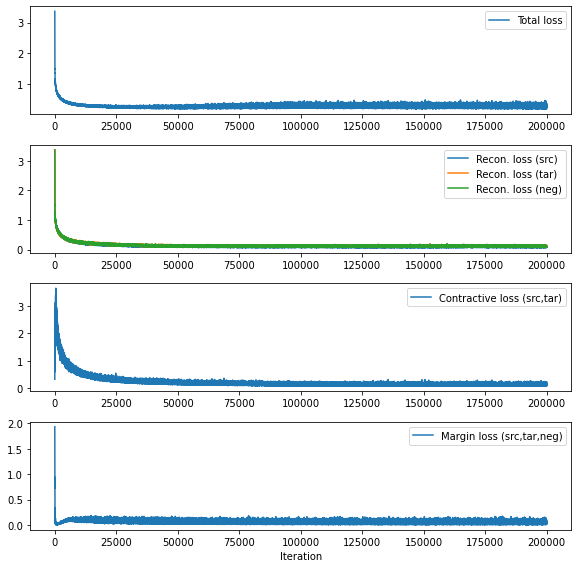

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

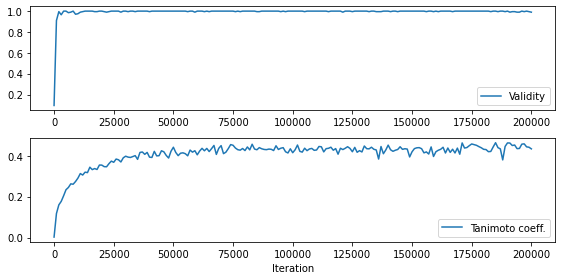

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()